In [121]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 0. 데이터 불러오기

In [122]:
df5 = pd.read_csv('C:\\study\\workspace_python\pdsample\\3_상권분석을 위한 유동인구에 따른 카드 매출액 변화 데이터 활용.csv',encoding = 'cp949')

In [123]:
df5.drop('데이터기준일자', axis = 1, inplace = True)

결측치가 없기 때문에 바로 피처 엔지니어링 해도 된다고 판단.  

# 1. 데이터 전처리

|칼럼명|칼럼내용|
|--------|-------------|
|년월|각 행의 정보의 시점을 알려줌|
|시도명|제주도 행정구역 중 시에 관한 정보|
|읍면동명|제주도 행정구역 중 읍면동에 관한 정보|
|업종명|업종 소분류|
|성별|소비자 성별|
|이용금액|총 구매금액|
|거주인구|제주도 특정 행정구역의 인구수 |
|근무인구|특정 시기의 특정 구역의 근무인구 수|
|방문인구|특정 시기의 특정 구역의 근무인구 수|
|데이터기준일자|데이터 등록 일자|


## 1.1 피처 엔지니어링

### 1.1.1 년,월 column 생성

In [124]:
year = []
for i in df5['년월'].str.split('-'):
    year.append(i[0])
    

In [125]:
month = []
for i in df5['년월'].str.split('-'):
    month.append(i[1])
    
df5['연도'] = year
df5['월'] = month

In [126]:
#연도와 월에 관한 정보를 추출했으니 년월 칼럼은 필요 없다고 생각하여 삭제

df5.drop('년월', axis  = 1, inplace = True)

#연도와 월 칼럼은 추출 원리상 문자형이기 때문에 다시 숫자형으로 변환

df5['월'] = df5['월'].astype(int)
df5['연도'] = df5['연도'].astype(int)

### 1.1.2 계절 column 생성

> 아이디어  :
> 계절별로 업종명별 이용금액을 파악하여, 계절에 따른 인기 품목을 알 수 있겠다 생각했다.

In [127]:
df_cd = df5.copy()

In [128]:
df_cd['계절'] = 0

In [129]:
#오류가 생성이 되는데 어떻게 하면 없앨 수 있을지 모르겠네여...


spring = [3,4,5]
summer = [6,7,8]
fall = [9,10,11]
winter = [12,1,2]

for i in range(len(df_cd['계절'])):
    if df_cd['월'][i] in spring:
        df_cd['계절'][i] = '봄'
    elif df_cd['월'][i] in summer:
        df_cd['계절'][i] = '여름'
    elif df_cd['월'][i] in fall:
        df_cd['계절'][i] = '가을'
    elif df_cd['월'][i] in winter:
        df_cd['계절'][i] = '겨울'
        


<ipython-input-129-f811cf542b22>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cd['계절'][i] = '겨울'
C:\ca_da\anaconda\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
<ipython-input-129-f811cf542b22>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cd['계절'][i] = '봄'
<ipython-input-129-f811cf542b22>:13: SettingWithCopyWarning: 
A value

### 1.1.3 업종명 대분류 column 생성

>아이디어 : 소매업, 음식점업, 입대업 등등으로 크게 분류해서 대분류명별 구매금액을 나타낼 수 있다.  
>그리고 음식점업 중에서 한식, 중식, 일식 소분류로 나누어 각 분류별 구매금액도 나타낼 수 있다고 생각

- 대분류를 총 7 개로 나눌 예정
    - 소매업
    - 음식점
    - 주류점 (주류 소비와 음식 소비 분석을 나누고 싶었음)
    - 운송업
    - 숙박업
    - 기타

In [131]:
#소분류를 참조하여 대분류 리스트를 생성

retail = ['건강보조식품 소매업','슈퍼마켓','수산물 소매업','빵 및 과자류 소매업', '기타음식료품위주종합소매업',
         '그외 기타 종합 소매업','과실 및 채소 소매업','육류 소매업','화장품 및 방향제 소매업','기타 대형 종합 소매업',
         '관광 민예품 및 선물용품 소매업','체인화 편의점','면세점']

food_store = ['서양식 음식점업', '기타 외국식 음식점업','중식 음식점업','일식 음식점업',
              '한식 음식점업','피자, 햄버거, 샌드위치 및 유사 음식점업']

drink = ['비알콜 음료점업','기타 주점업','일반유흥 주점업']

vehicle = ['택시 운송업','버스 운송업','정기 항공 운송업','내항 여객 운송업','자동차 임대업']

service = ['그외 기타 분류안된 오락관련 서비스업','기타 수상오락 서비스업']

rooms = ['휴양콘도 운영업', '여관업','호텔업']

others = [ '스포츠 및 레크레이션 용품 임대업','골프장 운영업', '전시 및 행사 대행업', '차량용 가스 충전업',
          '차량용 주유소 운영업','욕탕업',  '그외 기타 스포츠시설 운영업','여행사업', '마사지업','기타 갬블링 및 베팅업']




In [132]:
#시리즈에 넣을 데이터를 만들기 위해서 리스트 안에 조건부 정보를 집어 넣기.

job_type = []
for i in range(len(df_cd['업종명'])):
    if df_cd['업종명'][i] in retail:
        job_type.append('소매업')
    elif df_cd['업종명'][i] in food_store:
        job_type.append('음식점')
    elif df_cd['업종명'][i] in vehicle:
        job_type.append('운송업')
    elif df_cd['업종명'][i] in drink:
        job_type.append('주류')
    elif df_cd['업종명'][i] in service:
        job_type.append('서비스업')
    elif df_cd['업종명'][i] in rooms:
        job_type.append('숙박업')
    else :
        
        job_type.append('기타')
        
        
#업종 대분류 칼럼을 생성

job_type_series = pd.Series(data = job_type)
job_type_series
df_cd['업종 대분류'] = job_type_series


# 2. 탐색적 데이터 분석

## 2.1 각 칼럼별 데이터 type 확인

> 각 칼럼별 데이터 유형을 확인해서 어떤 탐색 기법을 사용할지 판단

|범주형 데이터||구간 데이터|
|----------|----------|----------|
|시도명|  |이용금액|
|읍면동명|  |거주인구|
|업종명|  |근무인구|
|성별|  |방문인구|
|계절|  | |
|업종 대분류|  | |
|연도|  | |
|월|  | |

## 2.2 각 칼럼별 수치와 그래프 

범주형 데이터만 가져와서 데이터 프레임 살펴보기

### 2.2.1 범주형 데이터

In [134]:
import pandas as pd
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt
import seaborn as sns

##### 시도명

<AxesSubplot:ylabel='시도명'>

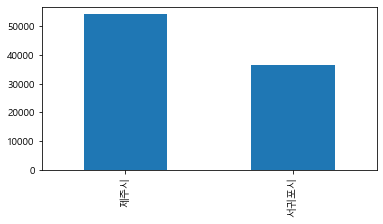

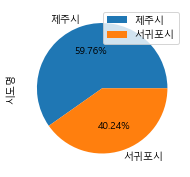

In [135]:
#1 - 시도명
#두 유형의 데이터를 가짐

count = df_cd['시도명'].value_counts()
fm = mp.font_manager.FontManager()
plt.rcParams['font.family'] = 'Malgun Gothic'

plt.figure(figsize=(6,3))
count.plot(kind = 'bar')
plt.figure(figsize=(6,3))
count.plot(kind = 'pie', legend = True, autopct = '%.2f%%')



제주시가 59.76% 로 40.24 서귀포시 보다 더 많은 행을 가지고 있음.  
즉, 제주시에서 소비한 건수가 더 많다고 할 수 있다.  

##### 읍면동명

<AxesSubplot:>

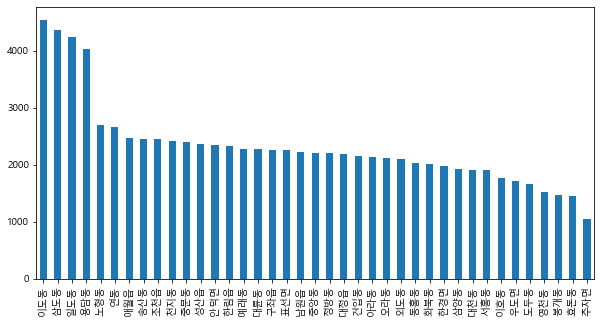

In [165]:
count2 = df_cd['읍면동명'].value_counts()
plt.figure(figsize = (10,5))
count2.plot(kind = 'bar')

노형동이 가장 많은 비율을 가지고 있다.  
근데 다른 csv 파일에는 1동, 2동으로 나뉘어져 있지 않고 합쳐져 있기 때문에 맞추기 위해서 합치려고 한다  

> 잠깐 여기서 다시 전처리

In [137]:
#용담2동, 삼도2동, 삼도1동, 용담1동, 이도2동, 이도1동, 일도1동, 일도2동 을 "~동" 으로 바꾸기
df_cd['읍면동명'].replace({'용담2동' : '용담동', '삼도2동' : '삼도동', '삼도1동' : '삼도동',
                      '용담1동' : '용담동', '이도2동' : '이도동', '이도1동' : '이도동', '일도1동' : '일도동',
                      '일도2동' : '일도동'}, inplace = True)
count2_2=df_cd['읍면동명'].value_counts()

In [138]:
#틀리지 않고 바뀐 것을 확인

print(count2['삼도1동'] + count2['삼도2동'] == count2_2['삼도동'], count2['용담2동'] + count2['용담1동'] == count2_2['용담동'])

True True


<AxesSubplot:>

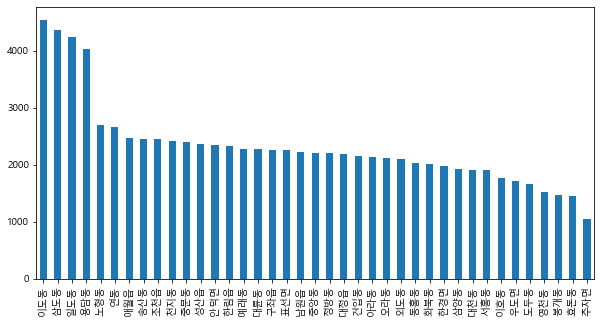

In [141]:
plt.figure(figsize = (10,5))
count2_2.plot(kind = 'bar')

1동 2동을 합치게 되니 각 칼럼의 도수와 상대도수 비율이 달라지게 됨  
본래는 노형동이 가장 큰 상대도수를 가지고 있었는데, 이도 -> 삼도 -> 일도 순으로 높은 도수를 보임

##### 성별

<AxesSubplot:ylabel='성별'>

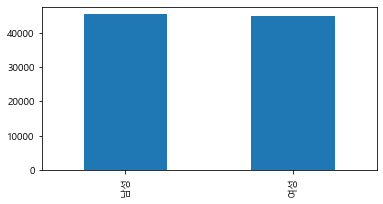

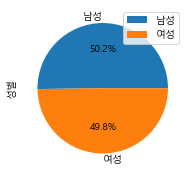

In [142]:
count4 = df_cd['성별'].value_counts()
plt.figure(figsize = (6,3))
count4.plot(kind = 'bar')
plt.figure(figsize = (6,3))
count4.plot(kind = 'pie', autopct = '%.1f%%', legend = True)

상대도수는 별반 차이가 나지 않음을 확인, 거의 50 : 50

##### 계절

<AxesSubplot:>

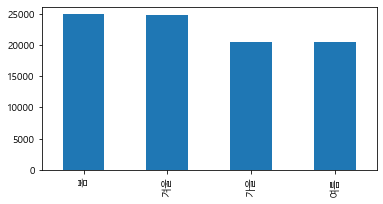

In [143]:
count5 = df_cd['계절'].value_counts()
plt.figure(figsize = (6,3))
count5.plot(kind = 'bar')

봄 여름 가을 겨울 상대도수 차이가 나긴 하지만 거의 차이가 나지 않는 것으로 판별

##### 업종 대분류

In [144]:
#소매업, 주류, 숙박업, 기타, 음식점, 운송업, 서비스업
df_cd['업종 대분류'].unique()

array(['소매업', '주류', '숙박업', '기타', '음식점', '운송업', '서비스업'], dtype=object)

<AxesSubplot:ylabel='업종 대분류'>

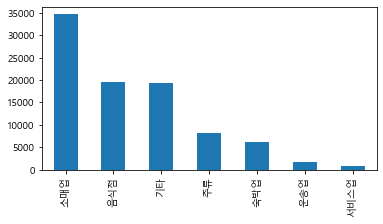

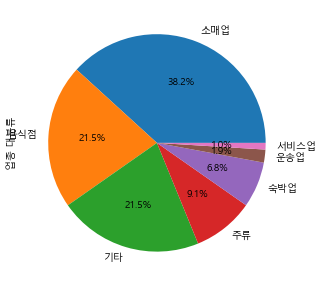

In [145]:
count6 = df_cd['업종 대분류'].value_counts()
plt.figure(figsize = (6,3))
count6.plot(kind = 'bar')
plt.figure(figsize = (10,5))
count6.plot(kind = 'pie', autopct = '%.1f%%')

소매업이 가장 많은 도수를 기록했고 그 다음이 음식점  
제일 낮은 업종은 서비스업.

##### 연도

<AxesSubplot:>

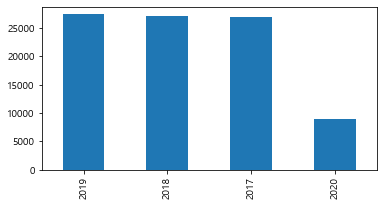

In [146]:
count7 = df_cd['연도'].value_counts()
plt.figure(figsize = (6,3))
count7.plot(kind = 'bar')

2019 > 2018 > 2017 > 2020 순으로 도수를 기록  
그러나 2018과 2019 그리고 2017은 얼마 차이가 나지 않음  

##### 월

<AxesSubplot:>

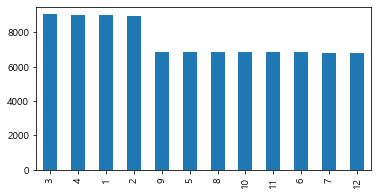

In [147]:
count8 = df_cd['월'].value_counts()
plt.figure(figsize = (6,3))
count8.plot(kind = 'bar')

### 2.2.2 구간 데이터

In [148]:
#이용금액, 거주인구, 근무인구,방문인구 살펴볼 예정
#따로 데이터 프레임을 만든 후에 통계적 수치 확인할 예정

df_test = df_cd[['이용금액','거주인구','근무인구','방문인구']]
df_test.describe()

,이용금액,거주인구,근무인구,방문인구
count,9.054300e+04,9.054300e+04,9.054300e+04,9.054300e+04
mean,6.093301e+07,4.613725e+06,5.338092e+05,2.864406e+06
std,1.864599e+08,4.603426e+06,6.111749e+05,2.127175e+06
min,1.000000e+01,1.858176e+05,2.665910e+03,1.770581e+05
25%,2.667500e+06,1.234469e+06,1.714008e+05,1.424893e+06
50%,1.212000e+07,3.187437e+06,3.062155e+05,2.259516e+06
75%,4.827680e+07,5.874926e+06,5.903735e+05,3.539383e+06
max,5.092990e+09,2.021119e+07,3.437408e+06,1.015129e+07


| |이용금액|거주인구|방문인구|
|-----|-----|-----|-----|
|평균|60933010.0 |4613725.0 | 2864406.0|
|표준편차|18645990.0 |4603426.0 |2127175.0 |
|최솟값|10.0 |185817.6 |177058.1|
|최댓값|5092990000.0 |20211190.0 |10151290.0 |

수치가 나타나긴 했지만 아직 이 수치가 정확한지 파악이 되지 않음.  
그리고 이 수치가 어떤 정보를 주는지 파악이 잘 안됨.  
따라서 그래프로 각각의 칼럼들을 그려보려고 함

히스토그램을 통해서 각각의 구간데이터의 분포를 살펴보려고 함  
그리고 boxplot 으로 상대 위치별 분포를 확인해보려고 함.  

##### 이용금액

<AxesSubplot:ylabel='Frequency'>

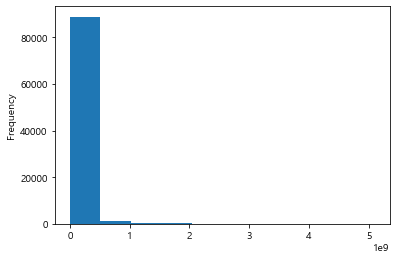

In [149]:
#히스토그램 파악하기
df_cd['이용금액'].plot(kind = 'hist')

>아이디어 : 이용금액 분포가 잘 나타나지 않음, 몇 개의 이상치 때문에 분포가 잘 나타나지 않는 것 같음  
> 따라서 온전한 분포를 보기 위해 잠시만 이상치를 제거해서 살펴보려고 함  
> 이상치 데이터들은 다시 되돌려 놓을 예정

{'whiskers': [<matplotlib.lines.Line2D at 0x1f42c038160>,
 'caps': [<matplotlib.lines.Line2D at 0x1f42c038820>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f42c040dc0>],
 'medians': [<matplotlib.lines.Line2D at 0x1f42c038ee0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f42768c2b0>],
 'means': []}

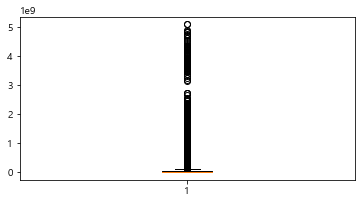

In [150]:
#박스플롯 확인하기

plt.figure(figsize=(6,3))
plt.boxplot(df_cd['이용금액'])

이상치가 엄청나게 많은 것을 확인할 수 있음. 이 때문에 분포를 제대로 파악하지 못함

> 잠깐 여기서 전처리

In [151]:
#이상치 제거하는 전처리 함수 생성

import numpy as np

def find_outlier_index(col_name):
    q1, q3 = np.percentile(df_cd[col_name], [25,75])          #1지점과 3지점을 파악
    iqr = q3 - q1                                             # 1 ~ 3 지역인 iqr 지역 파악
    lower_bound = q1 - (iqr * 1.5)                            #iqr 의 1.5배한 것을 1지역에서 뺀다 -> lower_bound 찾기 위해
    upper_bound = q3 + (iqr * 1.5)                            #iqr 의 1.5배한 것을 3지역에서 더한다 -> upper_bound를 찾기 위해
    
    index = np.where((df_cd[col_name] > upper_bound) | (df_cd[col_name] < lower_bound)) #lower,upper 범위 넘어선게 outlier, index추출
    return index
    


In [152]:
#튜플 형태로 index 반환, 0번째에 index, 1번째에 dtype
find_outlier_index('이용금액')

#각 구간데이터 모두 이상치를 확인해보니 굉장히 많았음 그래서 각 구간데이터의 분포가 잘 나타나지 않음

usage_amount_outiler_index = find_outlier_index('이용금액')[0]
resi_pop_outlier_index = find_outlier_index('거주인구')[0]
work_pop_outlier_index = find_outlier_index('근무인구')[0]
visit_pop_outlier_index = find_outlier_index('방문인구')[0]

In [153]:
#각 구간데이터 outlier index 를 합치기
outlier_index = np.concatenate((usage_amount_outiler_index,
                resi_pop_outlier_index,
                work_pop_outlier_index,
                visit_pop_outlier_index                
               ), axis = None)

In [154]:
#outlier index 아닌 index 만 리스트에 보관
non_outlier_index = []
for i in df_cd.index:
    if i not in outlier_index:
        non_outlier_index.append(i)


In [155]:
#df_cd_outlier 데이터 프레임을 따로 만들고 이걸로 구간데이터 시각화 작업
df_cd_outlier = df_cd.loc[non_outlier_index]

> 잠깐 전처리 종료

In [156]:
def print_graph(col_name):
    plt.figure(figsize = (6,3))                       #이용금액 히스토그램
    df_cd_outlier[col_name].plot(kind = 'hist')


    plt.figure(figsize = (6,3))                       #분포모양 만들기
    sns.distplot(df_cd_outlier[col_name])

    plt.figure(figsize = (6,3))                       #이용금액 boxplot 그리기 
    plt.boxplot(df_cd_outlier[col_name])

C:\ca_da\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


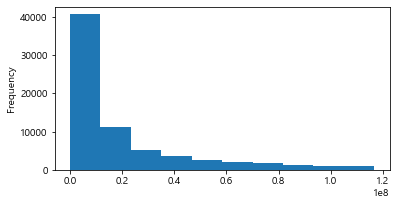

C:\ca_da\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ca_da\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


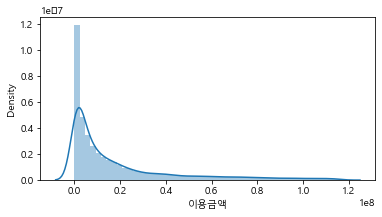

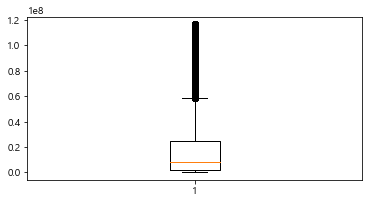

In [157]:
print_graph('이용금액')

이용금액에 관련하여 이상치 전처리를 한 이후에 분포모양을 살펴봤다.  
최댓값은 6000만원 정도  
최솟값은 0원에 가까운 정도  


##### 거주인구

<AxesSubplot:ylabel='Frequency'>

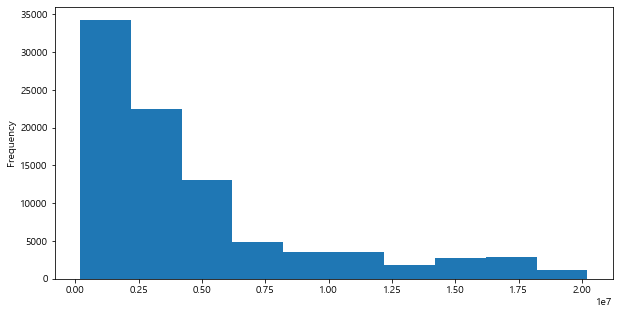

In [158]:
plt.figure(figsize = (10,5))                       #거주인구 히스토그램(전처리 전)
df_cd['거주인구'].plot(kind = 'hist')

C:\ca_da\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


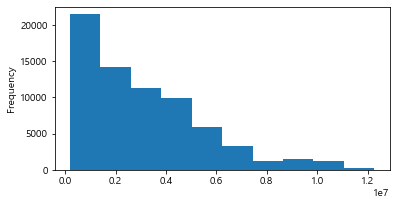

C:\ca_da\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ca_da\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


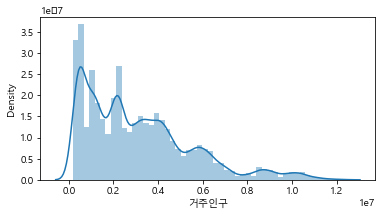

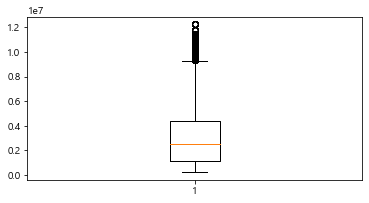

In [159]:
print_graph('거주인구')                     #이상치 제거 후의 분포도를 살펴보기

##### 근무인구

<AxesSubplot:ylabel='Frequency'>

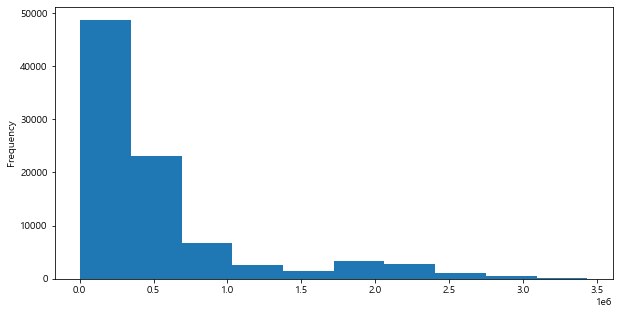

In [160]:
plt.figure(figsize = (10,5))                       #근무인구 히스토그램(전처리 전)
df_cd['근무인구'].plot(kind = 'hist')

C:\ca_da\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


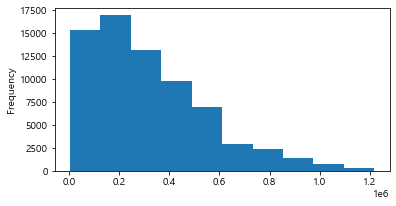

C:\ca_da\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ca_da\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


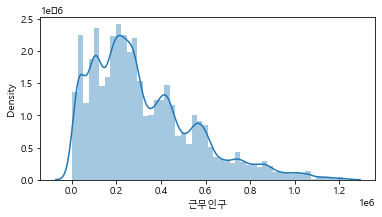

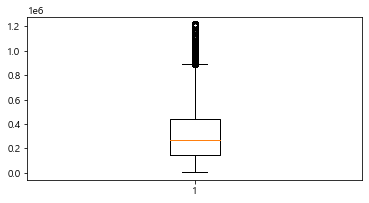

In [161]:
print_graph('근무인구')                     #이상치 제거 후의 분포도를 살펴보기

##### 방문인구

<AxesSubplot:ylabel='Frequency'>

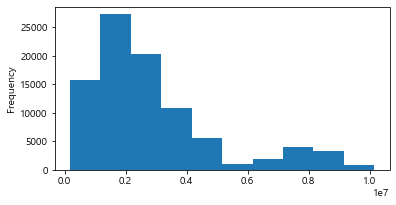

In [162]:
plt.figure(figsize = (6,3))                       #방문인구 히스토그램(전처리 전)
df_cd['방문인구'].plot(kind = 'hist')

C:\ca_da\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


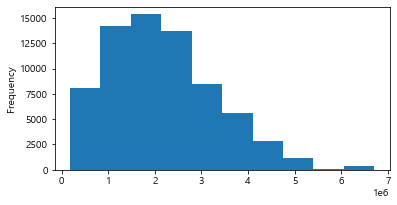

C:\ca_da\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ca_da\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


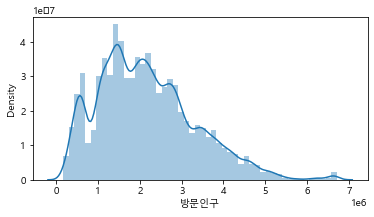

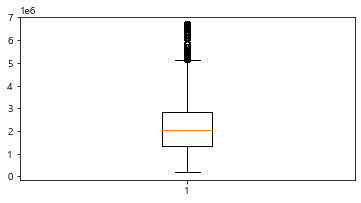

In [163]:
print_graph('방문인구')                     #이상치 제거 후의 분포도를 살펴보기


>분석할 것들  

1. 계절별 매출액이 가장 많은 업종  
=> 계절마다 강점인 업종을 찾을 수 있을거라 기대됨  

2. 음식점 총 매출액에서 한식, 양식, 중식의 매출액 비교  
=>제주도에서 어떤 음식점이 강세인지 파악 가능하다.  

3. 시별 총 매출액  
=> 어떤 시에서 매출액이 많이 나오는지 파악하기  
=> 어떤 시가 매출액이 많이 나오는지 파악이 되면 왜 많이 나오는지 파악  
	ㄴ> 이때 유동인구 기반해서 파악해보기 (ex.거주인구 너 때문? 근무인구 너 때문? 방문인구 너야?)  
=> 그 시는 어떤 업종이 매출액에 많은 기여를 했는지  
 

4. 읍면동명별 매출액  
=> 어떤 읍면동에서 매출액이 많이 나오는지 파악하고 싶을 때  
=> 어떤 읍면동이 매출액이 많이 나오는지 파악이 되면 왜 매출액이 많이 나올까 파악  
	ㄴ> 마찬가지로 유동인구 기반해서 파악해보기(유동인구 때문에 매출액이 많이 나올까?)  
		(가설 : 매출액이 많으면 유동인구가 많다)  
=> 그 읍면동에서 어떤 업종이 매출액에 많은 기여를 했는지  

5. 성별 매출액  
=> 어떤 성의 매출액이 더 강세인지 (특정 성별 타겟 정하기)  

6. 매출액이 가장 큰 업종 대분류 中, 가장 큰 비율을 차지하는 소업종  


7. 어떤 달이 매출이 가장 큰지 파악하기  
=> 왜 그 달에 매출이 가장 큰지 유추해보기  
=> 데이터로는 알아볼 수 없지만, 연휴인지 휴가철인지 파악할 수 있을듯.  

8. 유동인구(방문인구)가 가장 많은 시 or 읍 찾아보기  
	(가설 : 유동인구가 많으면 매출액이 많다)  
=> 유동인구가 많은 곳이 매출액이 많은지 적은지 파악  
=> IF 유동인구가 많은 곳이 매출액이 많다면 -> 1. 유동인구의 성별 파악 2. 어떤 업종이 많은지 파악  

. 

### 최종

In [368]:
df_cd.to_csv('상권분석을 위한 유동인구에 따른 카드 매출액 변화 데이터 활용.csv', index = False)